In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sensitivity as sns

# Our Mission

700x320
300 - 1.5 

300 ----- 1.5
700 ----- x

In [2]:
700 * 1.5 / 300

3.5

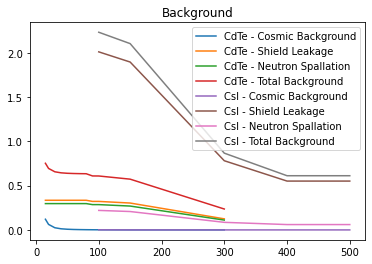

In [15]:
cdte_bg_curves = pd.read_csv('cdtebg.csv')
csi_bg_curves = pd.read_csv('csibg.csv')
cdte_energies = cdte_bg_curves['energy'].values # keV
csi_energies = csi_bg_curves['energy'].values # keV
cdte_mass_attentuation_coefficients = cdte_bg_curves['massatt'].values
csi_mass_attentuation_coefficients = csi_bg_curves['massatt'].values
cdte_background_values = {
    'density' : 5.85, # g/cc
    'shield_thickness' : 10, # cm 
    'mass_attentuation_coefficients' : cdte_mass_attentuation_coefficients, 
    'energies' : cdte_energies, # keV
    'solid_angle' : 0.7, # sterdaiens
    'shield_leakage_bg_count_rates' : cdte_bg_curves['fig8'].values,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : cdte_bg_curves['fig5'].values,
    'thickness': 0.2, # cm
    'area': 3466.88, # cm^2
    'material': 'CdTe',
}
csi_background_values = {
    'density' : 4.51, # g/cc
    'shield_thickness' : 0.84, # cm 
    'mass_attentuation_coefficients' : csi_mass_attentuation_coefficients, 
    'energies' : csi_energies, # keV
    'solid_angle' : 0.7, # sterdaiens
    'shield_leakage_bg_count_rates' : csi_bg_curves['fig8'].values,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : csi_bg_curves['fig5'].values,
    'thickness': 0.2, # cm
    'area': 3466.88, # cm^2
    'material': 'CsI',
}

cdte_bg_noise = sns.Background(**cdte_background_values)
cdte_background = cdte_bg_noise.calculate_bg()
fig, ax = plt.subplots()
ax = cdte_bg_noise.ploty(ax, show_plot=False)

csi_bg_noise = sns.Background(**csi_background_values)
csi_background = csi_bg_noise.calculate_bg()
# fig, ax = plt.subplots()
a = csi_bg_noise.ploty(ax)

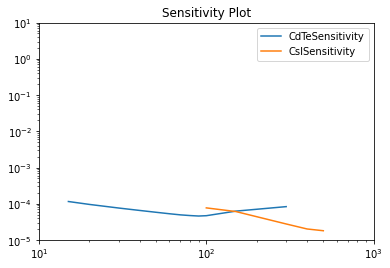

In [16]:
cdte_sensitivity_values = {
    'background_noise' : cdte_background,
    'detector_efficiency' : cdte_bg_noise.efficiencies,
    'energies' : cdte_energies, # keV
    'area' : 3466.85, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': 'CdTe',
}
cdte_sensitivity = sns.Sensitivity(**cdte_sensitivity_values)
cdte_sensitivities = cdte_sensitivity.calculate_sensitivity()
snsfig, snsax = plt.subplots()
snsax = cdte_sensitivity.ploty(snsax, show_plot=False)

csi_sensitivity_values = {
    'background_noise' : csi_background,
    'detector_efficiency' : cdte_bg_noise.efficiencies,
    'energies' : csi_energies, # keV
    'area' : 3466.85, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': 'CsI',
}
csi_sensitivity = sns.Sensitivity(**csi_sensitivity_values)
csi_sensitivities = csi_sensitivity.calculate_sensitivity()
# snsfig, snsax = plt.subplots()
snsax = csi_sensitivity.ploty(snsax, show_plot=False)
snsax.set_xlim(10, 1e3)
snsax.set_ylim(1e-5, 10)
plt.show()

# ax = sensitivity.ploty(ax)
# ax.plot(sensitivity.energies, sensitivity.sensitivities * 1.6022E-09)

# Swift Bat 

In [5]:
bat_bg_curves = pd.read_csv('batbgcurves.csv')
bat_energies = bat_bg_curves['energy'].values # keV
bat_mass_attentuation_coefficients = bat_bg_curves['massatt'].values
bat_background_values = {
    'density' : 5.76, # g/cc
    'shield_thickness' : 10, # cm 
    'mass_attentuation_coefficients' : bat_mass_attentuation_coefficients, 
    'energies' : bat_energies, # keV
    'solid_angle' : 1.4, # sterdaiens
    'shield_leakage_bg_count_rates' : bat_bg_curves['fig8'].values,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : bat_bg_curves['fig5'].values,
    'thickness': 0.2, # cm
    'area': 5200, # cm^2
}
bat_bg_noise = sns.Background(**bat_background_values)
bat_background = bat_bg_noise.calculate_bg()
batfig, batax = plt.subplots()
bat_bg_noise.ploty(batax)


TypeError: __init__() missing 1 required positional argument: 'material'

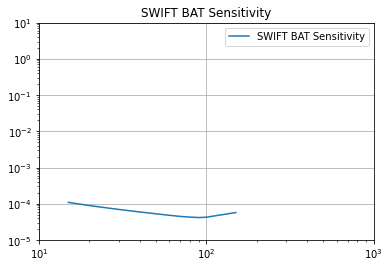

In [ ]:
bat_sensitivity_values = {
    'background_noise' : bat_background,
    'detector_efficiency' : bat_bg_noise.efficiencies,
    'energies' : bat_energies, # keV
    'area' : 5200, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
}
bat_sensitivity = sns.Sensitivity(**bat_sensitivity_values)
bat_sensitivities = bat_sensitivity.calculate_sensitivity()
batfig, batax = plt.subplots()
batax = bat_sensitivity.ploty(batax, show_plot=False)
batax.set_xlim(10, 1e3)
batax.set_ylim(1e-5, 10)
batax.set_title('SWIFT BAT Sensitivity')
batax.legend(['SWIFT BAT Sensitivity'])
plt.show()


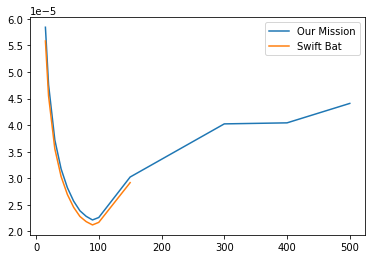

In [ ]:
figc, axc = plt.subplots()
axc.plot(sns.sensitivity.energies, sns.sensitivity.sensitivities, label='Our Mission')
axc.plot(bat_sensitivity.energies, bat_sensitivity.sensitivities, label='Swift Bat')
axc.legend()